# pandas: new functionality for in-memory operations

Pandas is a packages that adds functionality very similar to a R DataFrame but for the Python ecosystem.

## Example of a DataFrame

In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'int_col' : [1,2,6,8,-1],
                   'float_col' : [0.1, 0.2,0.2,10.1,None],
                   'str_col' : ['a','b',None,'c','a']})
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## Indexing

In [2]:
### Selecting a subset of columns

In [3]:
df[['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


### Boolean indexing

In [4]:
df[df['float_col'] > 0.15]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [5]:
df[(df['float_col'] > 0.1) & (df['int_col']>2)]

,float_col,int_col,str_col
2,0.2,6,None
3,10.1,8,c


In [6]:
df[(df['float_col'] > 0.1) | (df['int_col']>2)]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [7]:
df[~(df['float_col'] > 0.1)]

,float_col,int_col,str_col
0,0.1,1,a
4,NaN,-1,a


## Renaming columns

In [8]:
# This does a *copy* of the dataframe
df2 = df.rename(columns={'int_col' : 'some_other_name'})
df2

,float_col,some_other_name,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [9]:
# Set `inplace` to True if you don't want a copy
df2.rename(columns={'some_other_name' : 'int_col'}, inplace = True)
df2

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## Handling missing values

This is one of the most powerful weaponery in pandas

### Drop missing values

In [10]:
df2

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [11]:
df2.dropna()  # drop all rows with missing data

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
3,10.1,8,c


### Fill missing values

In [12]:
df3 = df.copy()
mean = df3['float_col'].mean()
df3

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [13]:
# Replace NaNs using the mean of the available values 
df3['float_col'] = df3['float_col'].fillna(mean)

In [14]:
df3

,float_col,int_col,str_col
0,0.10,1,a
1,0.20,2,b
2,0.20,6,None
3,10.10,8,c
4,2.65,-1,a


## Vectorized computations

With these you can forget about writing your own loops (most of the times).

### map

In [15]:
df['str_col'].dropna().map(lambda x : 'map_' + x)

0    map_a
1    map_b
3    map_c
4    map_a
Name: str_col, dtype: object

### apply

In [16]:
df[['int_col','float_col']].apply(np.sqrt)

,int_col,float_col
0,1.000000,0.316228
1,1.414214,0.447214
2,2.449490,0.447214
3,2.828427,3.178050
4,NaN,NaN


### applymap

Use it to apply the function to each element of the DataFrame:

In [17]:
def some_fn(x):
   if type(x) is str:
     return 'applymap_' + x
   elif x:
     return 100 * x
   else:
     return

df.applymap(some_fn)

,float_col,int_col,str_col
0,10.0,100,applymap_a
1,20.0,200,applymap_b
2,20.0,600,None
3,1010.0,800,applymap_c
4,NaN,-100,applymap_a


### Vectorized mathematical and string operations

In [18]:
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3]})

In [19]:
df["C"] = df["A"] + df["B"]
df

,A,B,C
0,1,1.2,2.2
1,2,1.3,3.3


In [20]:
df["D"] = df["A"]*3
df

,A,B,C,D
0,1,1.2,2.2,3
1,2,1.3,3.3,6


In [21]:
df["E"] = np.sqrt(df["A"])
df

,A,B,C,D,E
0,1,1.2,2.2,3,1.000000
1,2,1.3,3.3,6,1.414214


### String operations

In [22]:
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3], "Z":["a","b"]})
df

,A,B,Z
0,1,1.2,a
1,2,1.3,b


In [23]:
df["F"] = df.Z.str.upper()
df

,A,B,Z,F
0,1,1.2,a,A
1,2,1.3,b,B


## GroupBy

In [24]:
df = pd.DataFrame({'int_col' : [1,2,6,8,-1],
                   'float_col' : [0.1, 0.2,0.2,10.1,None],
                   'str_col' : ['a','b','c','c','a']})
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,c
3,10.1,8,c
4,NaN,-1,a


In [25]:
grouped = df['float_col'].groupby(df['str_col'])
grouped.mean()

str_col
a    0.10
b    0.20
c    5.15
Name: float_col, dtype: float64

## Stats

Methods to describe your data.

In [26]:
df.describe()  # many parameters in one shot

/home/faltet/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,float_col,int_col
count,4.00000,5.000000
mean,2.65000,3.200000
std,4.96689,3.701351
min,0.10000,-1.000000
25%,NaN,1.000000
50%,NaN,2.000000
75%,NaN,6.000000
max,10.10000,8.000000


In [27]:
df.cov()  # covariance

,float_col,int_col
float_col,24.670000,12.483333
int_col,12.483333,13.700000


In [28]:
df.corr()  # correlation

,float_col,int_col
float_col,1.000000,0.760678
int_col,0.760678,1.000000


## Merge and Join

These are SQL join-like operations.

In [29]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,c
3,10.1,8,c
4,NaN,-1,a


In [30]:
other = pd.DataFrame({'str_col' : ['a','b'], 'some_val' : [1, 2]})
other

,some_val,str_col
0,1,a
1,2,b


Different ways of joining these:

In [31]:
pd.merge(df,other,on='str_col',how='inner')

,float_col,int_col,str_col,some_val
0,0.1,1,a,1
1,NaN,-1,a,1
2,0.2,2,b,2


In [32]:
pd.merge(df,other,on='str_col',how='outer')

,float_col,int_col,str_col,some_val
0,0.1,1,a,1.0
1,NaN,-1,a,1.0
2,0.2,2,b,2.0
3,0.2,6,c,NaN
4,10.1,8,c,NaN


In [33]:
pd.merge(df,other,on='str_col',how='left')

,float_col,int_col,str_col,some_val
0,0.1,1,a,1.0
1,0.2,2,b,2.0
2,0.2,6,c,NaN
3,10.1,8,c,NaN
4,NaN,-1,a,1.0


In [34]:
pd.merge(df,other,on='str_col',how='right')

,float_col,int_col,str_col,some_val
0,0.1,1,a,1
1,NaN,-1,a,1
2,0.2,2,b,2


## Plot

In [35]:
plot_df = pd.DataFrame(np.random.randn(1000,2),columns=['x','y'])

In [36]:
plot_df['y'] = plot_df['y'] + 3

### Regular plot

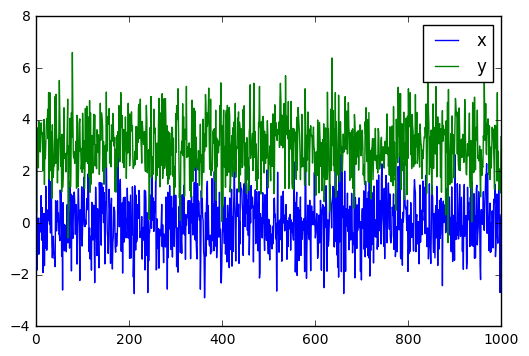

In [37]:
%matplotlib inline
plot_df.plot()

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08e8a3ae10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f08e4b58748>]], dtype=object)

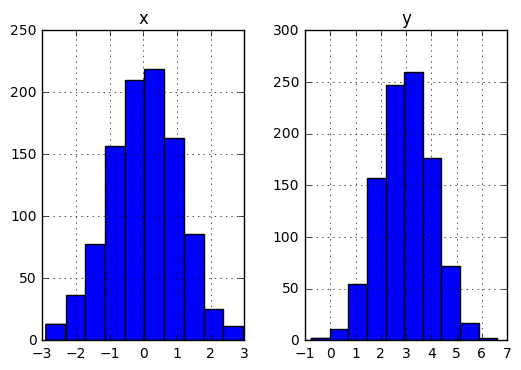

In [38]:
plot_df.hist()

## Conversion to NumPy arrays

In [39]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,c
3,10.1,8,c
4,NaN,-1,a


In [40]:
df.values[:,:-1]

array([[0.1, 1],
       [0.2, 2],
       [0.2, 6],
       [10.1, 8],
       [nan, -1]], dtype=object)

In [41]:
df.values[:,:-1].astype(np.float32)

array([[  0.1       ,   1.        ],
       [  0.2       ,   2.        ],
       [  0.2       ,   6.        ],
       [ 10.10000038,   8.        ],
       [         nan,  -1.        ]], dtype=float32)

## Integration with HDF5/PyTables

pandas leverages PyTables machinery for storage, but also their out-of-memory capabilities.

Here we have a small demo on how pandas and pytables interact:

In [42]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index,
               columns=['A', 'B', 'C'])
df

,A,B,C
2000-01-01,0.030944,0.280152,0.787991
2000-01-02,-0.819486,0.342800,-1.404929
2000-01-03,-1.207769,1.617601,-1.408238
2000-01-04,0.030478,-1.985971,-1.045047
2000-01-05,0.201233,0.167122,-0.941103
2000-01-06,0.691932,-1.157474,-0.046339
2000-01-07,-0.834678,-1.332999,0.239534
2000-01-08,-0.383746,-0.469313,-0.785185


In [43]:
df.to_hdf('store.h5','df',mode='w',format='table',data_columns=True)

In [44]:
# Let's have a look at how this dataframe has been serialized
import tables as tb
f = tb.open_file("store.h5")
f

File(filename=store.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/df (Group) ''
/df/table (Table(8,)) ''
  description := {
  "index": Int64Col(shape=(), dflt=0, pos=0),
  "A": Float64Col(shape=(), dflt=0.0, pos=1),
  "B": Float64Col(shape=(), dflt=0.0, pos=2),
  "C": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (2048,)
  autoindex := True
  colindexes := {
    "A": Index(6, medium, shuffle, zlib(1)).is_csi=False,
    "B": Index(6, medium, shuffle, zlib(1)).is_csi=False,
    "C": Index(6, medium, shuffle, zlib(1)).is_csi=False,
    "index": Index(6, medium, shuffle, zlib(1)).is_csi=False}

In [45]:
f.root.df.table[:]

array([ (946684800000000000, 0.030944209122033325, 0.2801515955704195, 0.7879906845916256),
       (946771200000000000, -0.819485876312802, 0.34280034865234976, -1.4049288523466565),
       (946857600000000000, -1.2077689040705535, 1.6176013637848325, -1.4082383941367451),
       (946944000000000000, 0.03047814356448529, -1.9859707632702923, -1.0450471808580861),
       (947030400000000000, 0.20123275980777056, 0.16712179657279255, -0.9411025315488178),
       (947116800000000000, 0.6919321237479645, -1.1574736810458612, -0.04633924454114237),
       (947203200000000000, -0.8346778412821719, -1.332999195733414, 0.2395341093905584),
       (947289600000000000, -0.3837455237962311, -0.4693125831845858, -0.7851850998184337)], 
      dtype=[('index', '<i8'), ('A', '<f8'), ('B', '<f8'), ('C', '<f8')])

In [46]:
f.root.df.table.cols.index[:]

array([946684800000000000, 946771200000000000, 946857600000000000,
       946944000000000000, 947030400000000000, 947116800000000000,
       947203200000000000, 947289600000000000])

In [47]:
f.root.df.table.cols.C[:]

array([ 0.78799068, -1.40492885, -1.40823839, -1.04504718, -0.94110253,
       -0.04633924,  0.23953411, -0.7851851 ])

In [48]:
f.close()

In [49]:
# On a later session we can retrieve this dataframe
store = pd.HDFStore('store.h5')
store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/df            frame_table  (typ->appendable,nrows->8,ncols->3,indexers->[index],dc->[A,B,C])

In [50]:
df2 = store.df
df2

,A,B,C
2000-01-01,0.030944,0.280152,0.787991
2000-01-02,-0.819486,0.342800,-1.404929
2000-01-03,-1.207769,1.617601,-1.408238
2000-01-04,0.030478,-1.985971,-1.045047
2000-01-05,0.201233,0.167122,-0.941103
2000-01-06,0.691932,-1.157474,-0.046339
2000-01-07,-0.834678,-1.332999,0.239534
2000-01-08,-0.383746,-0.469313,-0.785185


In [51]:
store.close()

More info on pandas/PyTables integration in: http://pandas-docs.github.io/pandas-docs-travis/io.html#hdf5-pytables